<a href="https://colab.research.google.com/github/SarthoPramanik1075/Machine-Learning-/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import StandardScaler

In [ ]:
hours_studied = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)
pass_exam = np.array([0,0,0,0,1,1,1,1,1])

toy_df=pd.DataFrame({
    "Hours_Studied":hours_studied.flatten(),
    "Pass_Exam":pass_exam
})

toy_df

,Hours_Studied,Pass_Exam
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1


In [ ]:
toy_model=LogisticRegression()
toy_model.fit(hours_studied,pass_exam)
print("Intercept (b): ", toy_model.intercept_)
print("Coefficient (w): ", toy_model.coef_)

Intercept (b):  [-5.29559243]
Coefficient (w):  [[1.17808562]]


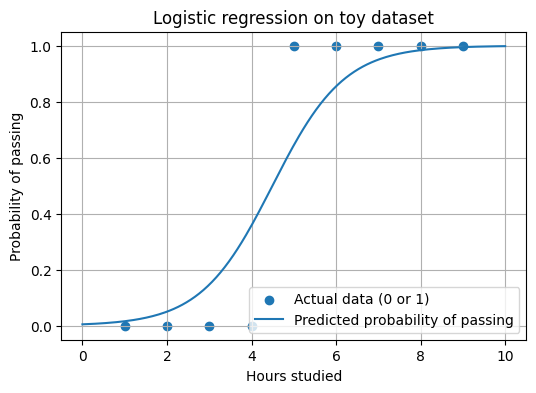

In [ ]:
  # Predict probabilities for a range of study hours
hours_grid = np.linspace(0, 10, 200).reshape(-1, 1)
pass_prob = toy_model.predict_proba(hours_grid)[:, 1]

# Plot data points and probability curve
plt.figure(figsize=(6, 4))
plt.scatter(hours_studied, pass_exam, label="Actual data (0 or 1)")
plt.plot(hours_grid, pass_prob, label="Predicted probability of passing")
plt.xlabel("Hours studied")
plt.ylabel("Probability of passing")
plt.title("Logistic regression on toy dataset")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
example_hours = np.array([[2],[4],[6],[8]])
example_probs = toy_model.predict_proba(example_hours)[:, 1]
example_preds = toy_model.predict(example_hours)

result_df=pd.DataFrame({
    "hours_studied":example_hours.flatten(),
    "predicted_probability":example_probs,
    "predicted_class":example_preds
})
result_df

,hours_studied,predicted_probability,predicted_class
0,2,0.050239,0
1,4,0.358185,0
2,6,0.854821,1
3,8,0.984158,1


In [ ]:

def sigmoid (z):
  return 1/(1+ np.exp(-z))

z_values = np.array([-5,-2,-1,0,1,2,5], dtype=float)
sig_values = sigmoid(z_values)

sig_df=pd.DataFrame({
    'z':z_values, 'sigmoid': np.round(sig_values,4)
})
sig_df

,z,sigmoid
0,-5.0,0.0067
1,-2.0,0.1192
2,-1.0,0.2689
3,0.0,0.5000
4,1.0,0.7311
5,2.0,0.8808
6,5.0,0.9933


In [ ]:
#Sigmoid Function
def sigmoid(z):
  return 1/(1+ np.exp(-z))

# Check some values
z_values = np.array([-5, -2, -1, 0, 1, 2, 5], dtype=float)
sig_values = sigmoid(z_values)

sig_df = pd.DataFrame({
    "z": z_values, "sigmoid(z)": np.round(sig_values, 4)
})
sig_df

,z,sigmoid(z)
0,-5.0,0.0067
1,-2.0,0.1192
2,-1.0,0.2689
3,0.0,0.5000
4,1.0,0.7311
5,2.0,0.8808
6,5.0,0.9933


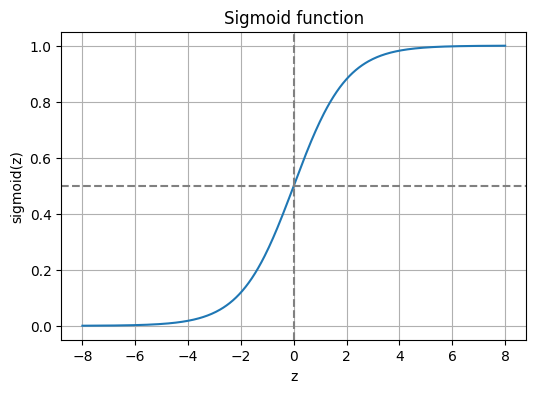

In [ ]:
z_grid = np.linspace(-8, 8, 400)
sig_grid = sigmoid(z_grid)

plt.figure(figsize=(6, 4))
plt.plot(z_grid, sig_grid)
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid function")
plt.grid(True)
plt.axhline(0.5, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.show()

In [ ]:
# Simple threshold demonstration
probabilities = np.array([0.1, 0.3, 0.49, 0.5, 0.7, 0.9])
threshold = 0.25
pred_class = (probabilities >= threshold).astype(int)

thresh_df = pd.DataFrame({
    "probability": probabilities,
    "class_at_threshold_0.5": pred_class
})
thresh_df

,probability,class_at_threshold_0.5
0,0.10,0
1,0.30,1
2,0.49,1
3,0.50,1
4,0.70,1
5,0.90,1
